In [1]:
from sympy import symbols, solve
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sympy'

In [51]:
dTe, dT, dqe, dqs, dq, dTi, dqi, r, m11, m12, m21, m22 = symbols('dTe, dT, dqe, dqs, dq, dTi, dqi, r, m11, m12, m21, m22', real = True) 
dTi = 0
equations = [(dTe - dT)/r - dqe,
            dqs + dqe - dq,
            dT*m11 + dq*m12 - dTi,
            dT*m21 + dq*m22 - dqi]

solutions = solve(equations, dT, dqi, dqe, dq, dict=True)
print(solutions[0][dT])
print(solutions[0][dqi])

(-dTe*m12 - dqs*m12*r)/(m11*r - m12)
(dTe*m11*m22 - dTe*m12*m21 + dqs*m11*m22*r - dqs*m12*m21*r)/(m11*r - m12)


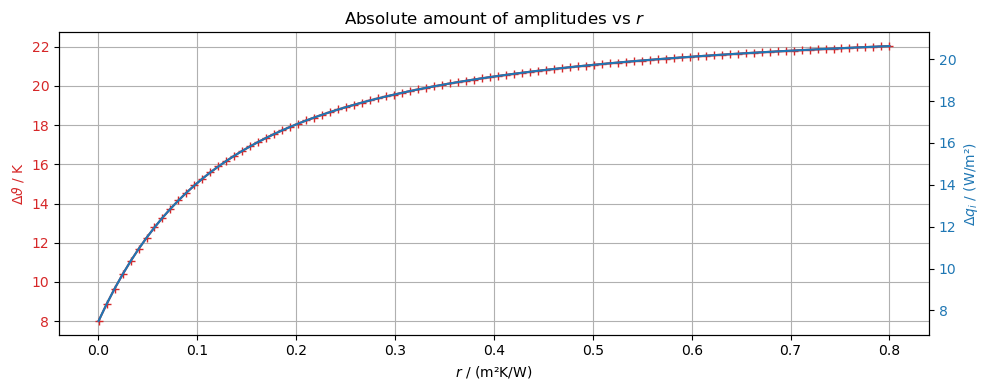

In [70]:
dTe   = 8
tau   = 0.8
alpha = 0.6
dqs   = 300 * tau * alpha

lam   = 0.5
rhocp = 1000 * 1000
d     = 0.3

T     = 24*3600

sigma = (T/np.pi * lam/rhocp)**0.5
H     = lam/sigma * (1 + 1j)
dd    = d/sigma * (1 + 1j)
m11   = np.cosh(dd)
m22   = m11
m12   = - 1/H * np.sinh(dd)
m21   = -H * np.sinh(dd)

r     = np.linspace(1e-4, 0.8, 100)
dT    = m12 * (dTe + dqs*r)/(m12 - m11*r)
dqi   = (dTe + dqs*r)/(m11*r - m12)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.set_title('Absolute amount of amplitudes vs $r$')
color = 'tab:red'
ax1.set_xlabel('$r$ / (m²K/W)')
ax1.set_ylabel(r'$\Delta \vartheta$ / K', color=color)
ax1.plot(r, np.abs(dT), color=color, marker='+')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$\Delta q_i$ / (W/m²)', color=color)  # we already handled the x-label with ax1
ax2.plot(r, np.abs(dqi), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [30]:
sigma

0.11726460285670079